<a href="https://colab.research.google.com/github/shuyaguan/0826/blob/main/Riya%26Shuya_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rajanand_rainfall_in_india_path = kagglehub.dataset_download('rajanand/rainfall-in-india')
gyanendrachaubey_flood_mapping_dataset_path = kagglehub.dataset_download('gyanendrachaubey/flood-mapping-dataset')
rhythmroy_sen12flood_flood_detection_dataset_path = kagglehub.dataset_download('rhythmroy/sen12flood-flood-detection-dataset')
naiyakhalid_flood_prediction_dataset_path = kagglehub.dataset_download('naiyakhalid/flood-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1A_IW_GRDH_1SDV_20190218T030905_20190218T030930_025978_02E4EB_98B8_corrected_VH.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1B_IW_GRDH_1SDV_20190331T161454_20190331T161529_015600_01D3F1_A8DB_corrected_VH.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1A_IW_GRDH_1SDV_20190419T030906_20190419T030931_026853_0304D2_B920_corrected_VV.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1B_IW_GRDH_1SDV_20190314T160646_20190314T160711_015352_01CBEE_21E5_corrected_VH.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S2_2019-01-31_B08.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1A_IW_GRDH_1SDV_20190419T030841_20190419T030906_026853_0304D2_1152_corrected_VH.tif
/kaggle/input/sen12flood-flood-detection-dataset/SEN12FLOOD/11/S1B_IW_GRDH_1SDV_20190302T160704_20190302T160733_015177_01C63

In [ ]:
# Install libraries (if needed, but Kaggle usually has them pre-installed)
!pip install rasterio geopandas xgboost -q  # For satellite images & geospatial data


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM
import xgboost as xgb
import rasterio  # For handling satellite images
import geopandas as gpd  # For geographic data
import os


In [ ]:
import pandas as pd

# Load dataset (modify filename if necessary)
df = pd.read_csv('/kaggle/input/flood-prediction-dataset/flood.csv')

# Display first 5 rows
df.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
# Check for missing values
df.isnull().sum()


,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [ ]:
# Check data types
df.dtypes


,0
MonsoonIntensity,int64
TopographyDrainage,int64
RiverManagement,int64
Deforestation,int64
Urbanization,int64
ClimateChange,int64
DamsQuality,int64
Siltation,int64
AgriculturalPractices,int64
Encroachments,int64


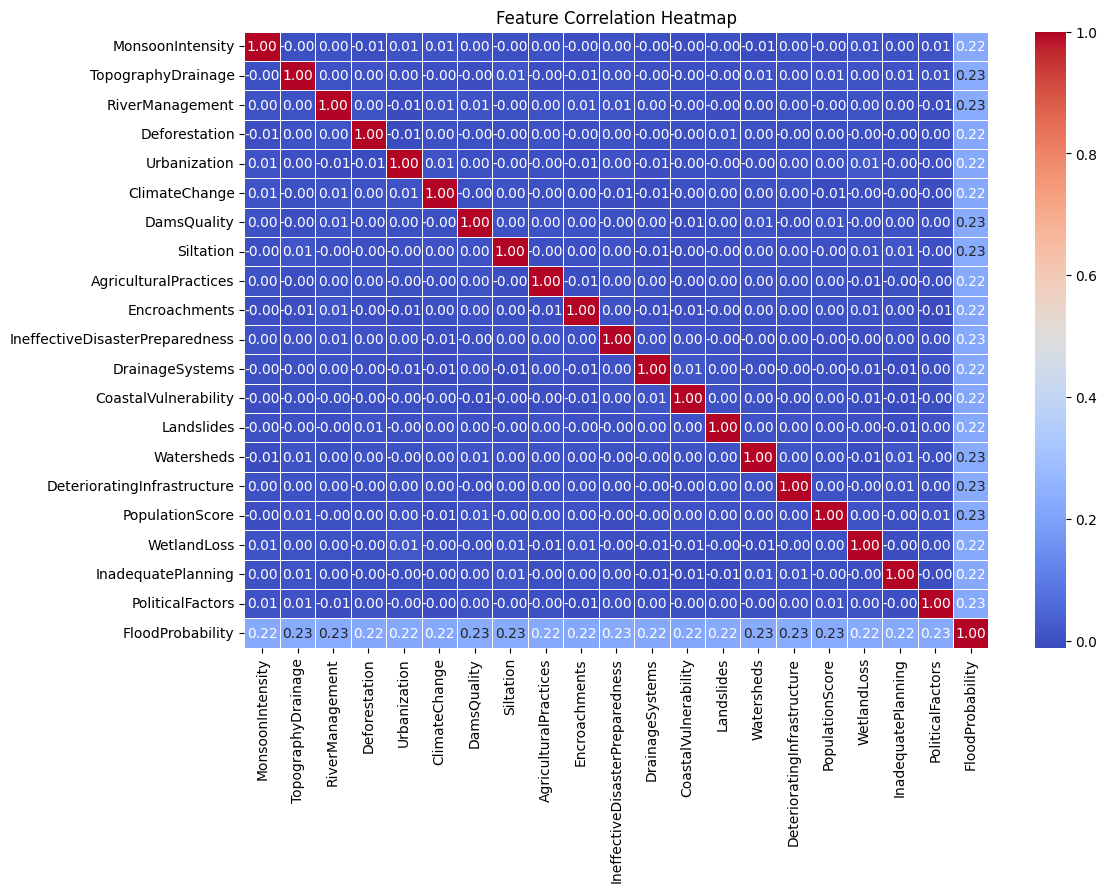

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define input (X) and target (y)
X = df.drop(columns=['FloodProbability'])  # Features
y = df['FloodProbability']  # Target

# Split dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 40000, Testing Samples: 10000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0205
Mean Squared Error (MSE): 0.0007
R² Score: 0.7295


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search
rf_tuned = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_iter=10, scoring='r2', n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Best model
best_rf = rf_tuned.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Evaluate
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned MAE: {mae_tuned:.4f}")
print(f"Tuned MSE: {mse_tuned:.4f}")
print(f"Tuned R² Score: {r2_tuned:.4f}")


Tuned MAE: 0.0204
Tuned MSE: 0.0007
Tuned R² Score: 0.7321


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")


XGBoost MAE: 0.0079
XGBoost MSE: 0.0001
XGBoost R² Score: 0.9587


<ipython-input-15-99d3eeeddf17>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


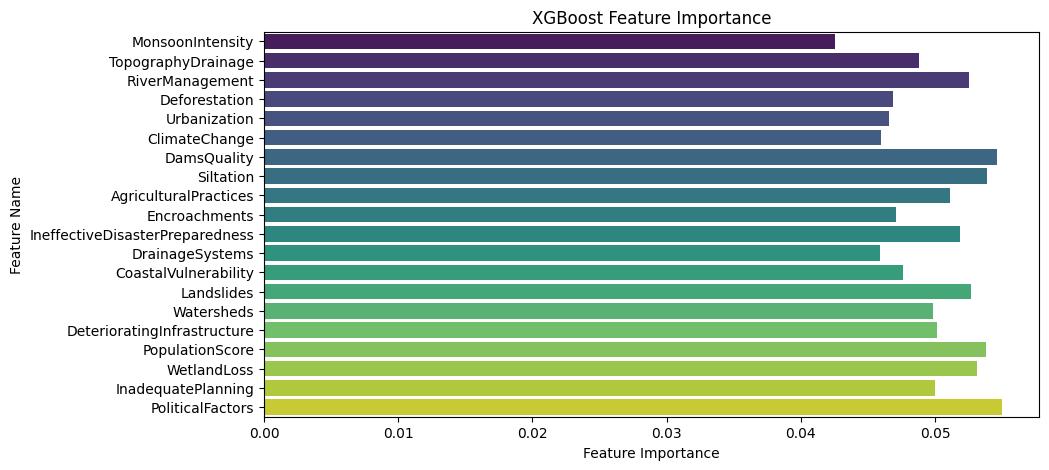

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
importance = xgb_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.show()


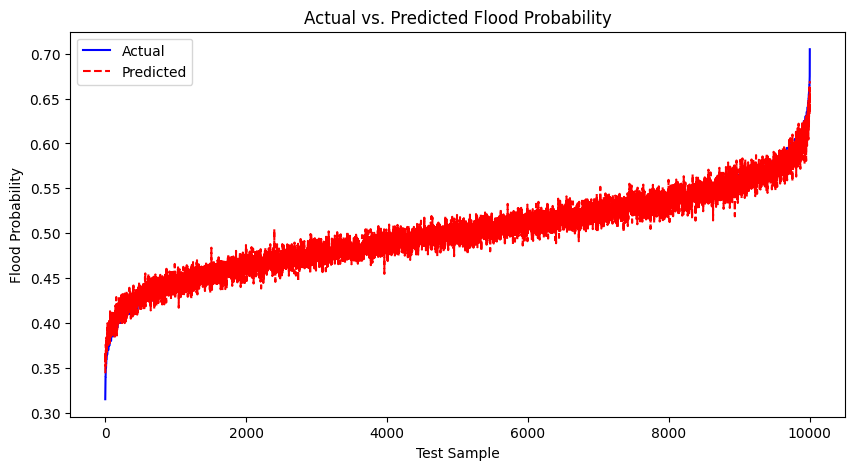

In [ ]:
import numpy as np

# Sort values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred_xgb[sorted_indices]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_sorted, label="Actual", color="blue")
plt.plot(y_pred_sorted, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Test Sample")
plt.ylabel("Flood Probability")
plt.legend()
plt.title("Actual vs. Predicted Flood Probability")
plt.show()


In [ ]:
import joblib

# Save model to a file
joblib.dump(xgb_model, "flood_prediction_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
loaded_model = joblib.load("flood_prediction_model.pkl")

# Sample test data (take 5 rows from X_test)
sample_data = X_test.iloc[:5]

# Make predictions
sample_predictions = loaded_model.predict(sample_data)

# Display results
print("Predicted Flood Probabilities:", sample_predictions)


Predicted Flood Probabilities: [0.4521162  0.50415355 0.48114592 0.46357152 0.47450262]


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.2 MB/s eta 0:00:00


In [ ]:


import gradio as gr
import joblib
import numpy as np

# Load the saved model
loaded_model = joblib.load("flood_prediction_model.pkl")

# Feature names (same as dataset)
feature_names = [
    "MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation", "Urbanization",
    "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices", "Encroachments",
    "IneffectiveDisasterPreparedness", "DrainageSystems", "CoastalVulnerability", "Landslides",
    "Watersheds", "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss",
    "InadequatePlanning", "PoliticalFactors"
]

# Prediction function
def predict_flood(*features):
    features = np.array(features).reshape(1, -1)
    prediction = loaded_model.predict(features)[0]
    return f"🌊 Predicted Flood Probability: {prediction:.2%} 🌊"


custom_css = """
body {
    background-color: #121212;
    color: #0F2C59;
}
.gradio-container {
    background: #F8F0E5;
    border-radius: 10px;
    padding: 20px;
}
button {
    background-color: #0F2C59 !important;
    color: white !important;
    border-radius: 8px !important;
    padding: 10px 20px !important;
    font-size: 16px !important;
}
button:hover {
    background-color: #0056b3 !important;
}
"""


app = gr.Interface(
    fn=predict_flood,
    inputs=[gr.Slider(0, 10, step=1, label=name) for name in feature_names],
    outputs="text",
    title=" =Flood Risk Prediction",
    description="Adjust the sliders to input environmental factors and get a predicted flood probability.",
    theme="dark",
    css=custom_css,
)

# Launch the app
app.launch()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1115: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-67fc183b-2d2c583f6602835248c82e35;160b9fcb-64e3-4920-87b2-46703f92808a)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://90fb2cc046d8ffdd0e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
